In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
us_gov_rec = pd.read_csv('US_GOV_Rec.csv',encoding= 'unicode_escape')
us_gov_act = pd.read_csv('US_GOV_Actor.csv',encoding= 'unicode_escape')

# US Government is Actor

In [3]:
df_ac = pd.DataFrame(us_gov_act)

In [4]:
df_ac['Date'] = pd.to_datetime(us_gov_act['Date'], format='%Y%m%d')
df_ac['Date'].dtype
df_ac['YearMonth'] = df_ac['Date'].dt.to_period('M')
df_ac

,Date,TargetCountry,TargetCountryCode,ReceivingCountry,ReceivingCountryCode,Action,NumArticles,AvgTone,AvgGoldsteinScale,Action Name,TargetCountryName,TargetCountryCodeName,ReceivingCountryName,ReceivingCountryCodeName,YearMonth
0,2016-01-01,1,1,1,2,45,3,0.561798,5.0,Express intent to cooperate,USA,GOV,USA,BUS,2016-01
1,2016-01-01,1,1,1,2,1053,16,-2.380270,-5.0,Deny responsibility,USA,GOV,USA,BUS,2016-01
2,2016-01-01,1,1,1,2,10,15,-6.219239,0.0,Acknowledge or claim responsibility,USA,GOV,USA,BUS,2016-01
3,2016-01-01,1,1,1,2,20,1,-4.666667,3.0,Make Public Statement,USA,GOV,USA,BUS,2016-01
4,2016-01-01,1,1,1,2,31,5,-2.564103,5.2,Engage in Diplomatic cooperation,USA,GOV,USA,BUS,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53105,2024-05-27,1,1,1,2,10,3,3.940887,0.0,Express intent to cooperate,USA,GOV,USA,BUS,2024-05
53106,2024-05-27,1,1,1,2,20,2,-2.761341,3.0,Appeal,USA,GOV,USA,BUS,2024-05
53107,2024-05-27,1,1,1,2,42,6,-2.188552,1.9,Engage in Material Cooperation,USA,GOV,USA,BUS,2024-05
53108,2024-05-27,1,1,1,2,43,2,1.192504,2.8,Appeal,USA,GOV,USA,BUS,2024-05


In [5]:
overall_us_gov_ac = df_ac['AvgTone'].mean()
print('Overall Average Sentiment when US Goverment is Actor:',overall_us_gov_ac )

Overall Average Sentiment when US Goverment is Actor: -1.162939640219036


### Daily Average Sentiments when US Government is Target

In [60]:
daily_us_gov_tar = df_ac.groupby(['Date']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
#daily_us_gov_tar

-1.1562383757824821

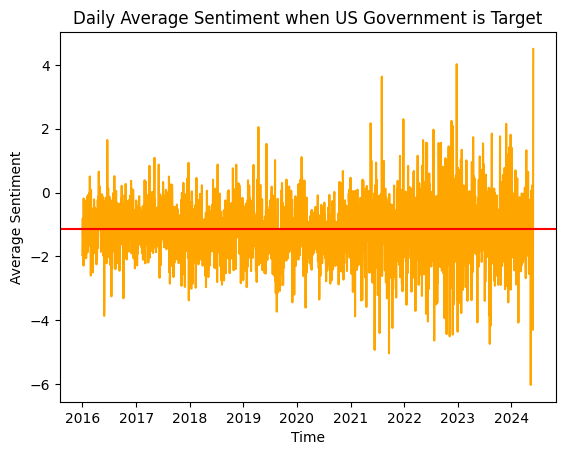

In [7]:
avg = daily_us_gov_tar['AvgSentiment'].mean()
plt.plot(daily_us_gov_tar['Date'],daily_us_gov_tar['AvgSentiment'], color = 'orange')
plt.axhline(y= avg, color='red')
plt.title('Daily Average Sentiment when US Government is Target')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
avg

### Daily Average Sentiment of Each Action when US Government is Target

In [61]:
daily_action_us_gov_act = df_ac.groupby(['Date','Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
#daily_action_us_gov_act

In [62]:
daily_action_pivot_act = daily_action_us_gov_act.pivot_table(index='Date', columns='Action Name', values='AvgSentiment',fill_value=0)
#daily_action_pivot_act

In [9]:
top_actions_daily = daily_action_us_gov_act.groupby('Action Name')['TotalArticleCount'].sum().nlargest(10).index
print('Daily Top 10 Actions when US Gov is Actor:\n',top_actions_daily.tolist())

Daily Top 10 Actions when US Gov is Actor:
 ['Make statement, not specified below', 'Engage in Material Cooperation', 'Make pessimistic comment', 'Yield', 'Make an appeal or request, not specified below', 'Deny responsibility', 'Appeal', 'Consider policy option', 'Consult', 'Make empathetic comment']


In [59]:
daily_action_pivot_act[top_actions_daily]

Action Name,"Make statement, not specified below",Engage in Material Cooperation,Make pessimistic comment,Yield,"Make an appeal or request, not specified below",Deny responsibility,Appeal,Consider policy option,Consult,Make empathetic comment
Date,,,,,,,,,,
2016-01-01,-0.469254,-3.200000,0.000000,0.000000,0.000000,-2.158164,-0.121427,0.000000,0.000000,0.000000
2016-01-02,-2.122827,-1.231532,0.000000,-1.461988,0.000000,-2.129907,-1.538572,0.000000,0.000000,0.000000
2016-01-03,0.671251,-3.697749,0.000000,0.000000,0.000000,0.000000,-4.118616,0.000000,-2.948403,0.000000
2016-01-04,-0.728080,0.000000,0.000000,-5.702364,0.000000,0.000000,-2.439290,-1.677193,1.015474,0.000000
2016-01-05,-2.363882,2.966102,0.000000,0.000000,-3.605064,0.000000,-3.106054,0.000000,-2.075227,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-05-24,-0.596421,-0.826446,0.000000,-0.570342,0.000000,0.000000,-0.897263,0.000000,0.000000,1.306993
2024-05-25,-1.537953,0.000000,0.000000,0.000000,0.000000,0.000000,-2.183406,0.000000,0.000000,0.000000
2024-05-26,-3.672788,-5.339806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Monthly Average Sentiments when US Government is Target

In [65]:
monthly_action_us_gov_act = df_ac.groupby(['YearMonth']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
#monthly_action_us_gov_act

### Monthly Average Sentiment of Each Action when US Government is Target

In [66]:
monthly_action_us_gov_act = df_ac.groupby(['YearMonth','Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
#monthly_action_us_gov_act

In [67]:
monthly_action_pivot_act = monthly_action_us_gov_act.pivot_table(index='YearMonth', columns='Action Name', values='AvgSentiment',fill_value=0)
#monthly_action_pivot_act

In [55]:
top_actions_monthly_act = monthly_action_us_gov_act.groupby('Action Name')['TotalArticleCount'].sum().nlargest(10).index
print('Daily Top 10 Actions when US Gov is Actor:\n',top_actions_monthly_act.tolist())

Daily Top 10 Actions when US Gov is Actor:
 ['Make statement, not specified below', 'Engage in Material Cooperation', 'Make pessimistic comment', 'Yield', 'Make an appeal or request, not specified below', 'Deny responsibility', 'Appeal', 'Consider policy option', 'Consult', 'Make empathetic comment']


In [56]:
monthly_action_pivot_act[top_actions_monthly_act]

Action Name,"Make statement, not specified below",Engage in Material Cooperation,Make pessimistic comment,Yield,"Make an appeal or request, not specified below",Deny responsibility,Appeal,Consider policy option,Consult,Make empathetic comment
YearMonth,,,,,,,,,,
2016-01,-1.399161,-1.282846,-1.008710,-1.740774,-1.824266,-1.317711,-0.862228,-0.978795,-1.130688,-1.562538
2016-02,-0.527010,-1.083023,-1.078171,-1.182718,-0.656456,-0.826882,-0.964213,-0.482531,-0.800614,-0.337983
2016-03,-0.427156,-0.684738,-0.888607,-1.422619,-1.199761,-1.702879,-0.369994,-0.413166,-1.644859,-0.289607
2016-04,-0.851934,-1.349762,-0.630863,-0.526016,-0.953804,-0.585686,-0.704005,-0.533616,-0.077347,-1.037185
2016-05,-0.508470,-1.511237,-0.921048,-1.815340,-1.082349,-1.471934,-1.230231,-0.331184,-1.284015,0.373484
...,...,...,...,...,...,...,...,...,...,...
2024-01,-0.804397,-1.755718,-0.423069,-0.916974,-1.768162,-2.187271,-0.870191,-0.515544,-0.953145,-1.881786
2024-02,-0.566290,-1.439917,-1.185534,-0.805514,1.190560,-2.319279,-0.973250,-2.298099,-1.720708,-2.021792
2024-03,-0.847006,-1.549687,-1.643510,-0.481524,0.440407,-1.798720,-1.096415,-1.633547,-1.326102,-1.572707


### Overall Average Sentiment of Each Action when US Government is Target

In [12]:
overall_action_us_gov_act = df_ac.groupby(['Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
overall_action_us_gov_act

,Action Name,TotalArticleCount,TotalActionCount,AvgSentiment,AvgGoldsteinScale
0,Accede to requests or demands for political re...,332,4,-0.440731,1.975000
1,"Accuse, not specified below",112,1,-2.090498,3.000000
2,Acknowledge or claim responsibility,9645,643,-0.779566,1.766096
3,"Allow international involvement, not specified...",344,4,0.367519,3.950000
4,Apologize,1100,20,-0.593895,2.410000
...,...,...,...,...,...
110,"Threaten with military force, not specified below",138,1,3.273470,4.500000
111,"Threaten with political dissent, protest",133,1,-1.236353,-2.000000
112,"Threaten, not specified below",130,1,0.633851,-4.000000
113,Yield,24176,3022,-1.209220,0.866082


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


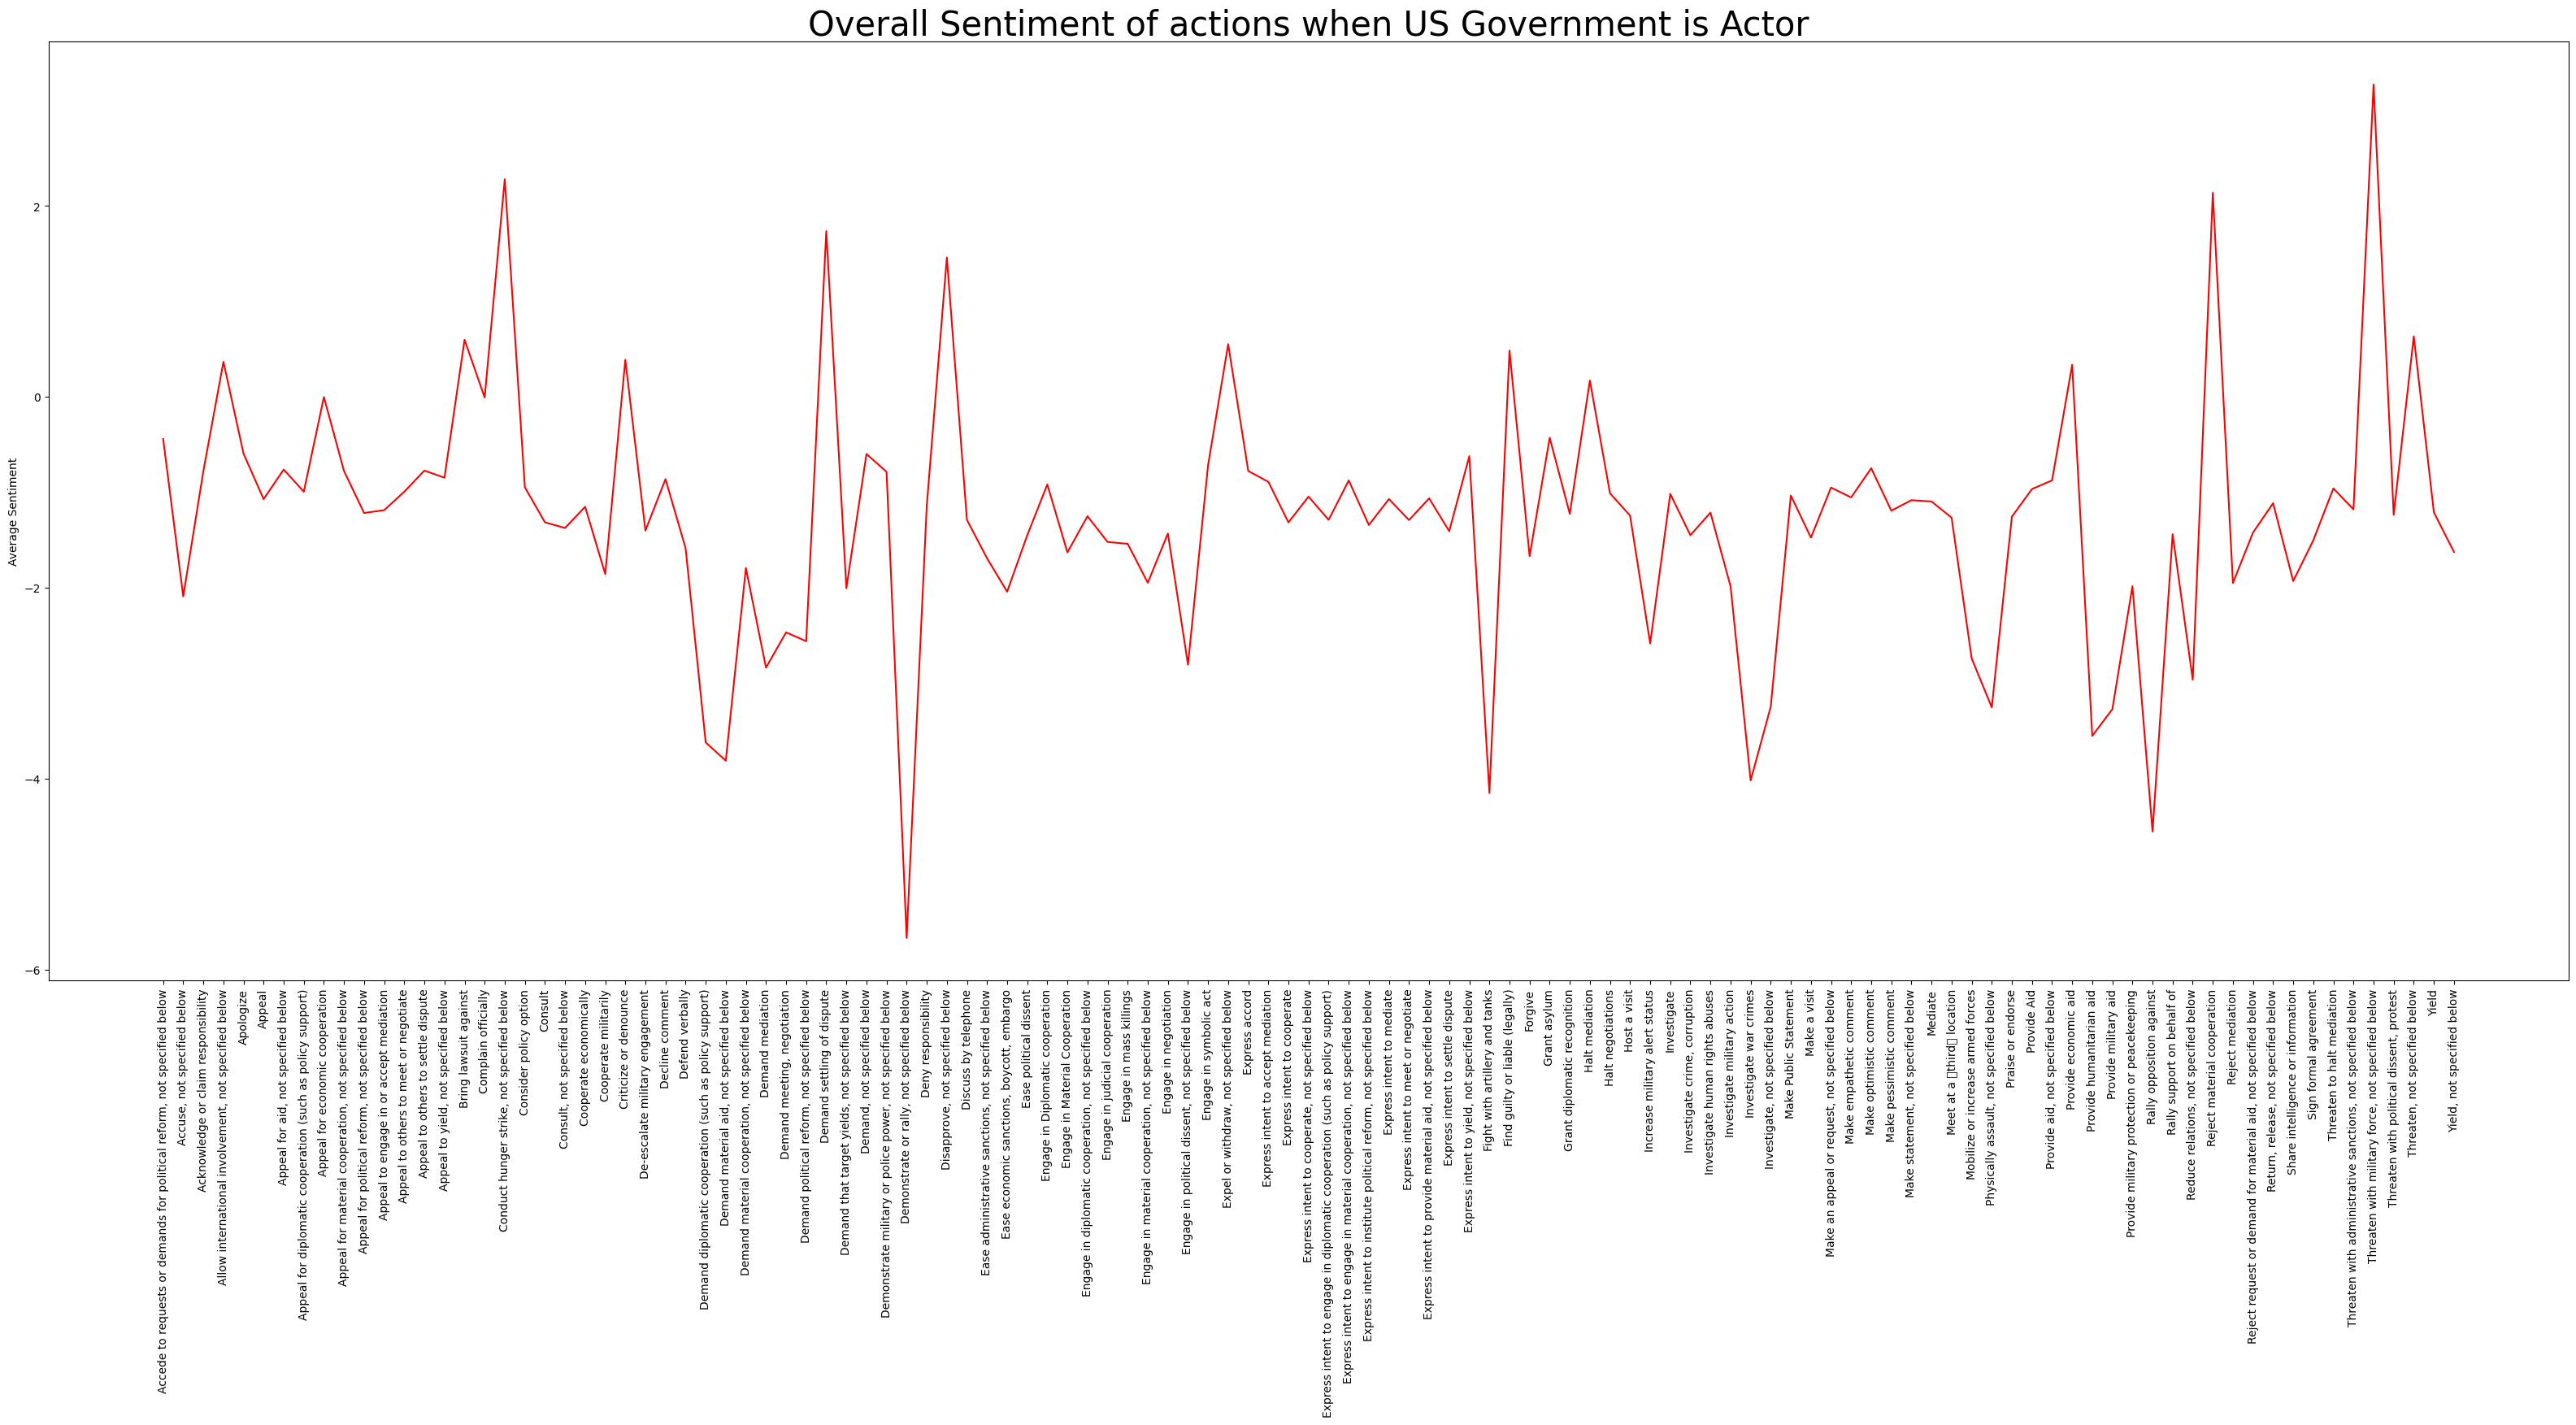

In [41]:
plt.figure(figsize = (40,15))
plt.plot(overall_action_us_gov_act['Action Name'],overall_action_us_gov_act['AvgSentiment'],color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Sentiment of actions when US Government is Actor', fontsize = 30)
plt.ylabel('Average Sentiment')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


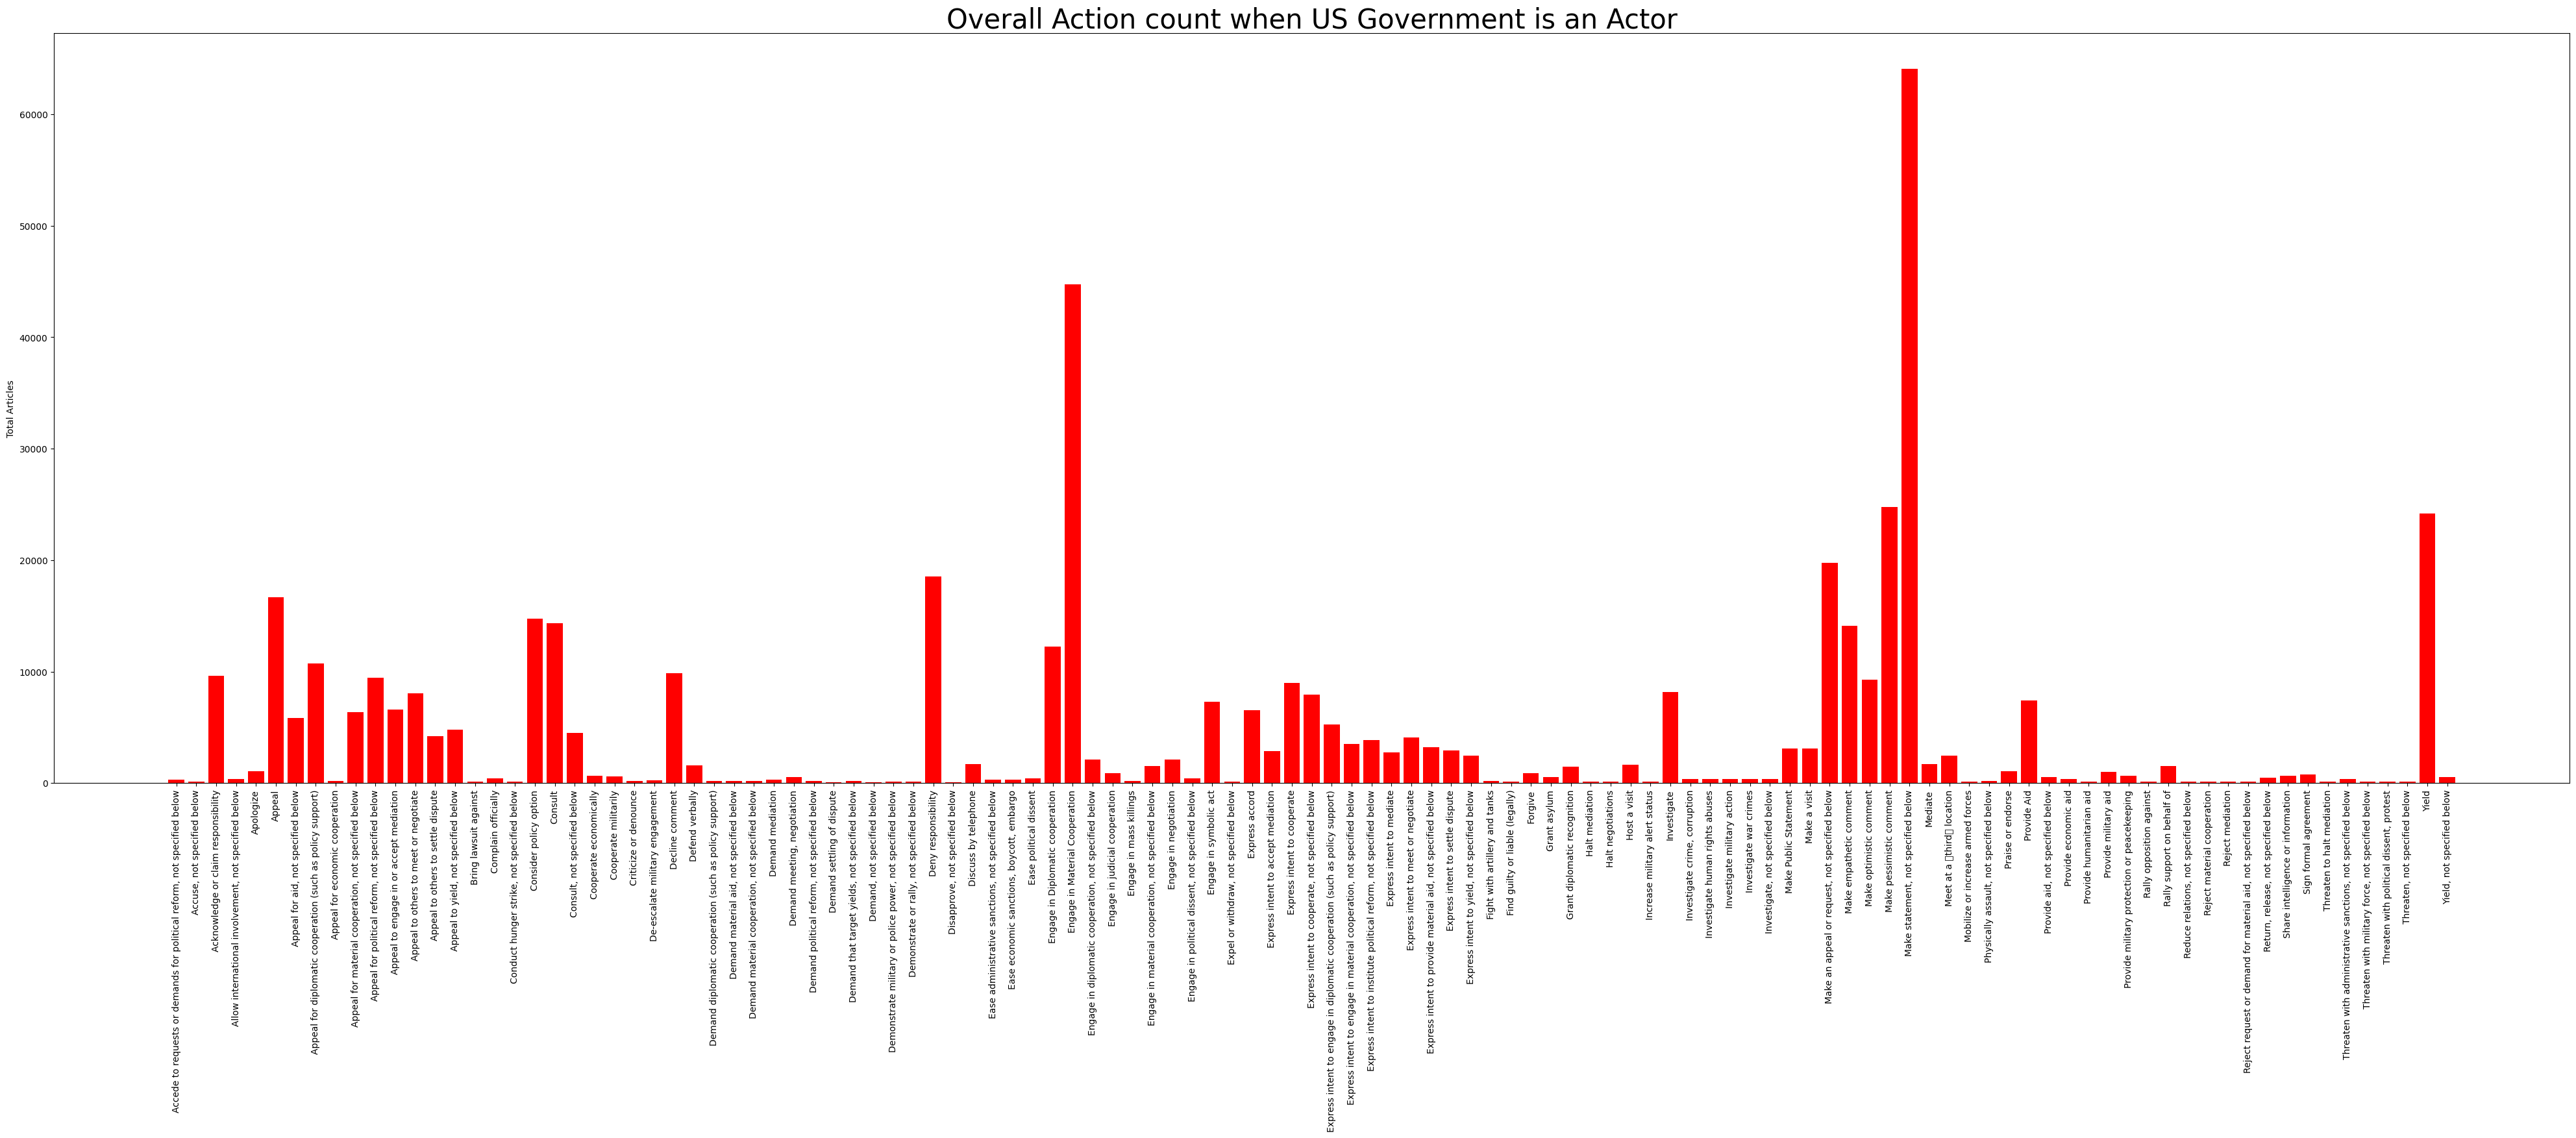

In [42]:
plt.figure(figsize = (50,15))
plt.bar(overall_action_us_gov_act['Action Name'],overall_action_us_gov_act['TotalArticleCount'],color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Action count when US Government is an Actor', fontsize = 30)
plt.ylabel('Total Articles')
plt.show()

# US Government is Recipient

In [20]:
df_rec = pd.DataFrame(us_gov_rec)
df_rec['Date'] = pd.to_datetime(us_gov_rec['Date'], format='%Y%m%d')
df_rec['Date'].dtype
df_rec['YearMonth'] = df_rec['Date'].dt.to_period('M')
df_rec

,Date,TargetCountry,TargetCountryCode,ReceivingCountry,ReceivingCountryCode,Action,NumArticles,AvgTone,AvgGoldsteinScale,Action Name,TargetCountryName,TargetCountryCodeName,ReceivingCountryName,ReceivingCountryCodeName,YearMonth
0,2016-01-01,1,2,1,1,10,4,0.309681,0.0,Consult,USA,BUS,USA,GOV,2016-01
1,2016-01-01,1,2,1,1,20,10,0.204181,3.0,"Make statement, not specified below",USA,BUS,USA,GOV,2016-01
2,2016-01-01,1,2,1,1,36,6,-4.166667,4.0,Engage in Material Cooperation,USA,BUS,USA,GOV,2016-01
3,2016-01-01,1,2,1,1,40,16,-1.936058,1.0,Deny responsibility,USA,BUS,USA,GOV,2016-01
4,2016-01-01,1,2,1,1,42,12,-1.993580,1.9,Make pessimistic comment,USA,BUS,USA,GOV,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38407,2024-05-27,1,2,1,1,42,2,1.192504,1.9,Appeal,USA,BUS,USA,GOV,2024-05
38408,2024-05-27,1,2,1,1,43,6,-2.188552,2.8,Engage in Material Cooperation,USA,BUS,USA,GOV,2024-05
38409,2024-05-27,1,2,1,1,51,3,1.682692,3.4,Express intent to cooperate,USA,BUS,USA,GOV,2024-05
38410,2024-05-27,1,2,1,1,71,1,1.121795,7.4,Make Public Statement,USA,BUS,USA,GOV,2024-05


In [16]:
overall_us_gov_rec = df_rec['AvgTone'].mean()
print('Overall Average Sentiment when US Goverment is Recipient:',overall_us_gov_rec )

Overall Average Sentiment when US Goverment is Recipient: -0.8206480764322152


### Daily Average Sentiments when US Government is Recipient

In [68]:
daily_us_gov_rec = df_rec.groupby(['Date']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
#daily_us_gov_rec

-0.8442356581310128

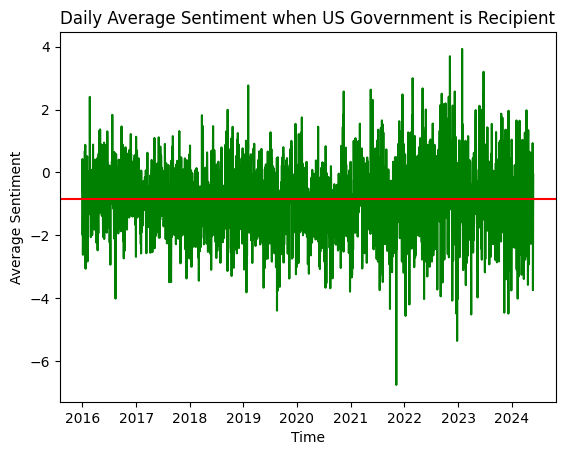

In [23]:
mu = daily_us_gov_rec['AvgSentiment'].mean()
plt.plot(daily_us_gov_rec['Date'],daily_us_gov_rec['AvgSentiment'], color = 'green')
plt.axhline(y= mu, color='red')
plt.title('Daily Average Sentiment when US Government is Recipient')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
mu

### Daily Average Sentiment of Each Action when US Government is Recipient


In [69]:
daily_action_us_gov_rec = df_rec.groupby(['Date','Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
#daily_action_us_gov_rec

In [70]:
action_daily_pivot_rec = daily_action_us_gov_rec.pivot_table(index='Date', columns='Action Name', values='AvgSentiment',fill_value=0)
#action_daily_pivot_rec

In [25]:
top_actions_daily_rec = daily_action_us_gov_rec.groupby('Action Name')['TotalArticleCount'].sum().nlargest(10).index
print('Daily Top 10 Actions when US Gov is Actor:\n',top_actions_daily_rec.tolist())

Daily Top 10 Actions when US Gov is Actor:
 ['Make statement, not specified below', 'Engage in Material Cooperation', 'Yield', 'Make pessimistic comment', 'Make an appeal or request, not specified below', 'Deny responsibility', 'Appeal', 'Consult', 'Engage in Diplomatic cooperation', 'Make empathetic comment']


In [78]:
action_top10_rec = action_daily_pivot_rec[top_actions_daily_rec]
action_top10_rec

Action Name,"Make statement, not specified below",Engage in Material Cooperation,Yield,Make pessimistic comment,"Make an appeal or request, not specified below",Deny responsibility,Appeal,Consult,Engage in Diplomatic cooperation,Make empathetic comment
Date,,,,,,,,,,
2016-01-01,-2.228737,-3.683333,0.000000,-1.993580,0.000000,-1.936058,-0.574713,0.309681,0.000000,0.000000
2016-01-02,-1.818182,1.590152,0.000000,0.000000,0.000000,-2.129907,2.697842,0.000000,0.000000,0.000000
2016-01-03,2.241379,0.000000,-2.241379,0.000000,-1.827098,0.000000,0.000000,0.000000,1.542416,-0.878360
2016-01-04,0.711744,0.000000,0.000000,0.000000,0.000000,0.000000,0.671892,-1.752901,0.000000,0.000000
2016-01-05,-1.723015,-6.446618,0.000000,0.000000,-5.186695,0.000000,-1.599724,0.000000,0.000000,-2.779889
...,...,...,...,...,...,...,...,...,...,...
2024-05-23,0.000000,10.526316,0.256759,0.000000,0.000000,0.000000,-0.092166,1.111111,0.000000,1.204574
2024-05-24,-1.335312,-0.826446,-2.483546,-4.324684,0.000000,0.000000,-2.312139,0.542005,0.000000,0.000000
2024-05-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Monthly Average Sentiments when US Government is Recipient

In [71]:
monthly_us_gov_rec = df_rec.groupby(['YearMonth']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
#monthly_us_gov_rec

### Monthly Average Sentiments of Each Action when US Government is Recipient

In [72]:
monthly_action_us_gov_rec = df_rec.groupby(['YearMonth','Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
#monthly_action_us_gov_rec

In [74]:
monthly_pivot_rec = monthly_action_us_gov_rec.pivot_table(index='YearMonth', columns='Action Name', values='AvgSentiment',fill_value=0)
#monthly_daily_pivot_rec

In [31]:
top_actions_monthly = daily_action_us_gov_rec.groupby('Action Name')['TotalArticleCount'].sum().nlargest(10).index
print('Monthly Top 10 Actions when US Gov is Recipient:\n',top_actions_monthly.tolist())

Monthly Top 10 Actions when US Gov is Recipient:
 ['Make statement, not specified below', 'Engage in Material Cooperation', 'Yield', 'Make pessimistic comment', 'Make an appeal or request, not specified below', 'Deny responsibility', 'Appeal', 'Consult', 'Engage in Diplomatic cooperation', 'Make empathetic comment']


In [75]:
monthly_top_10_rec = monthly_pivot_rec[top_actions_monthly]
monthly_top_10_rec 

Action Name,"Make statement, not specified below",Engage in Material Cooperation,Yield,Make pessimistic comment,"Make an appeal or request, not specified below",Deny responsibility,Appeal,Consult,Engage in Diplomatic cooperation,Make empathetic comment
YearMonth,,,,,,,,,,
2016-01,-0.887810,-1.471390,-1.315555,-0.421164,-1.157920,-0.604230,-0.111548,-1.364885,-1.178225,0.302585
2016-02,-1.176438,-0.634016,-0.875812,0.914550,-2.199114,-1.019023,-0.584572,-2.691432,-1.333867,-0.984203
2016-03,-0.215065,-0.202508,0.366435,-0.966242,-1.093898,-0.435318,-1.420845,-1.058820,-0.815490,-0.338432
2016-04,-0.280843,-0.775669,-1.263565,-1.106985,-1.672322,-1.484460,-0.518935,-1.100224,-0.152977,0.056453
2016-05,-0.618464,-1.076786,-0.601185,0.082245,-0.969771,-0.056415,-0.148863,-0.601892,-0.281087,-0.083798
...,...,...,...,...,...,...,...,...,...,...
2024-01,-1.624462,-1.131764,0.238368,0.535407,-0.848910,-2.894365,-0.712872,-0.558864,0.742533,1.430487
2024-02,-1.028542,-0.790803,-1.210261,-0.819066,0.340786,-1.441880,-0.670130,-0.596249,-0.017680,-1.896485
2024-03,-1.463142,-1.951039,-0.314376,-3.287616,2.194656,-1.707019,-0.919131,-0.051313,-0.655799,-0.469037


### Overall Average Sentiment of Each Action when US Government is Recipient

In [32]:
overall_action_us_gov_rec = df_rec.groupby(['Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')).reset_index()
overall_action_us_gov_rec

,Action Name,TotalArticleCount,TotalActionCount,AvgSentiment,AvgGoldsteinScale
0,"Accuse, not specified below",112,1,0.523836,-0.400000
1,Acknowledge or claim responsibility,6840,456,-0.532528,1.812281
2,Apologize,550,10,-1.004565,0.700000
3,Appeal,12126,6063,-0.996171,1.029276
4,"Appeal for aid, not specified below",3036,132,-0.467289,2.506818
...,...,...,...,...,...
86,Threaten to halt negotiations,134,1,-5.268249,-2.000000
87,"Threaten with administrative sanctions, not sp...",132,1,-2.569696,3.000000
88,Veto,129,1,-3.020893,1.000000
89,Yield,16440,2055,-0.901265,1.510657


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


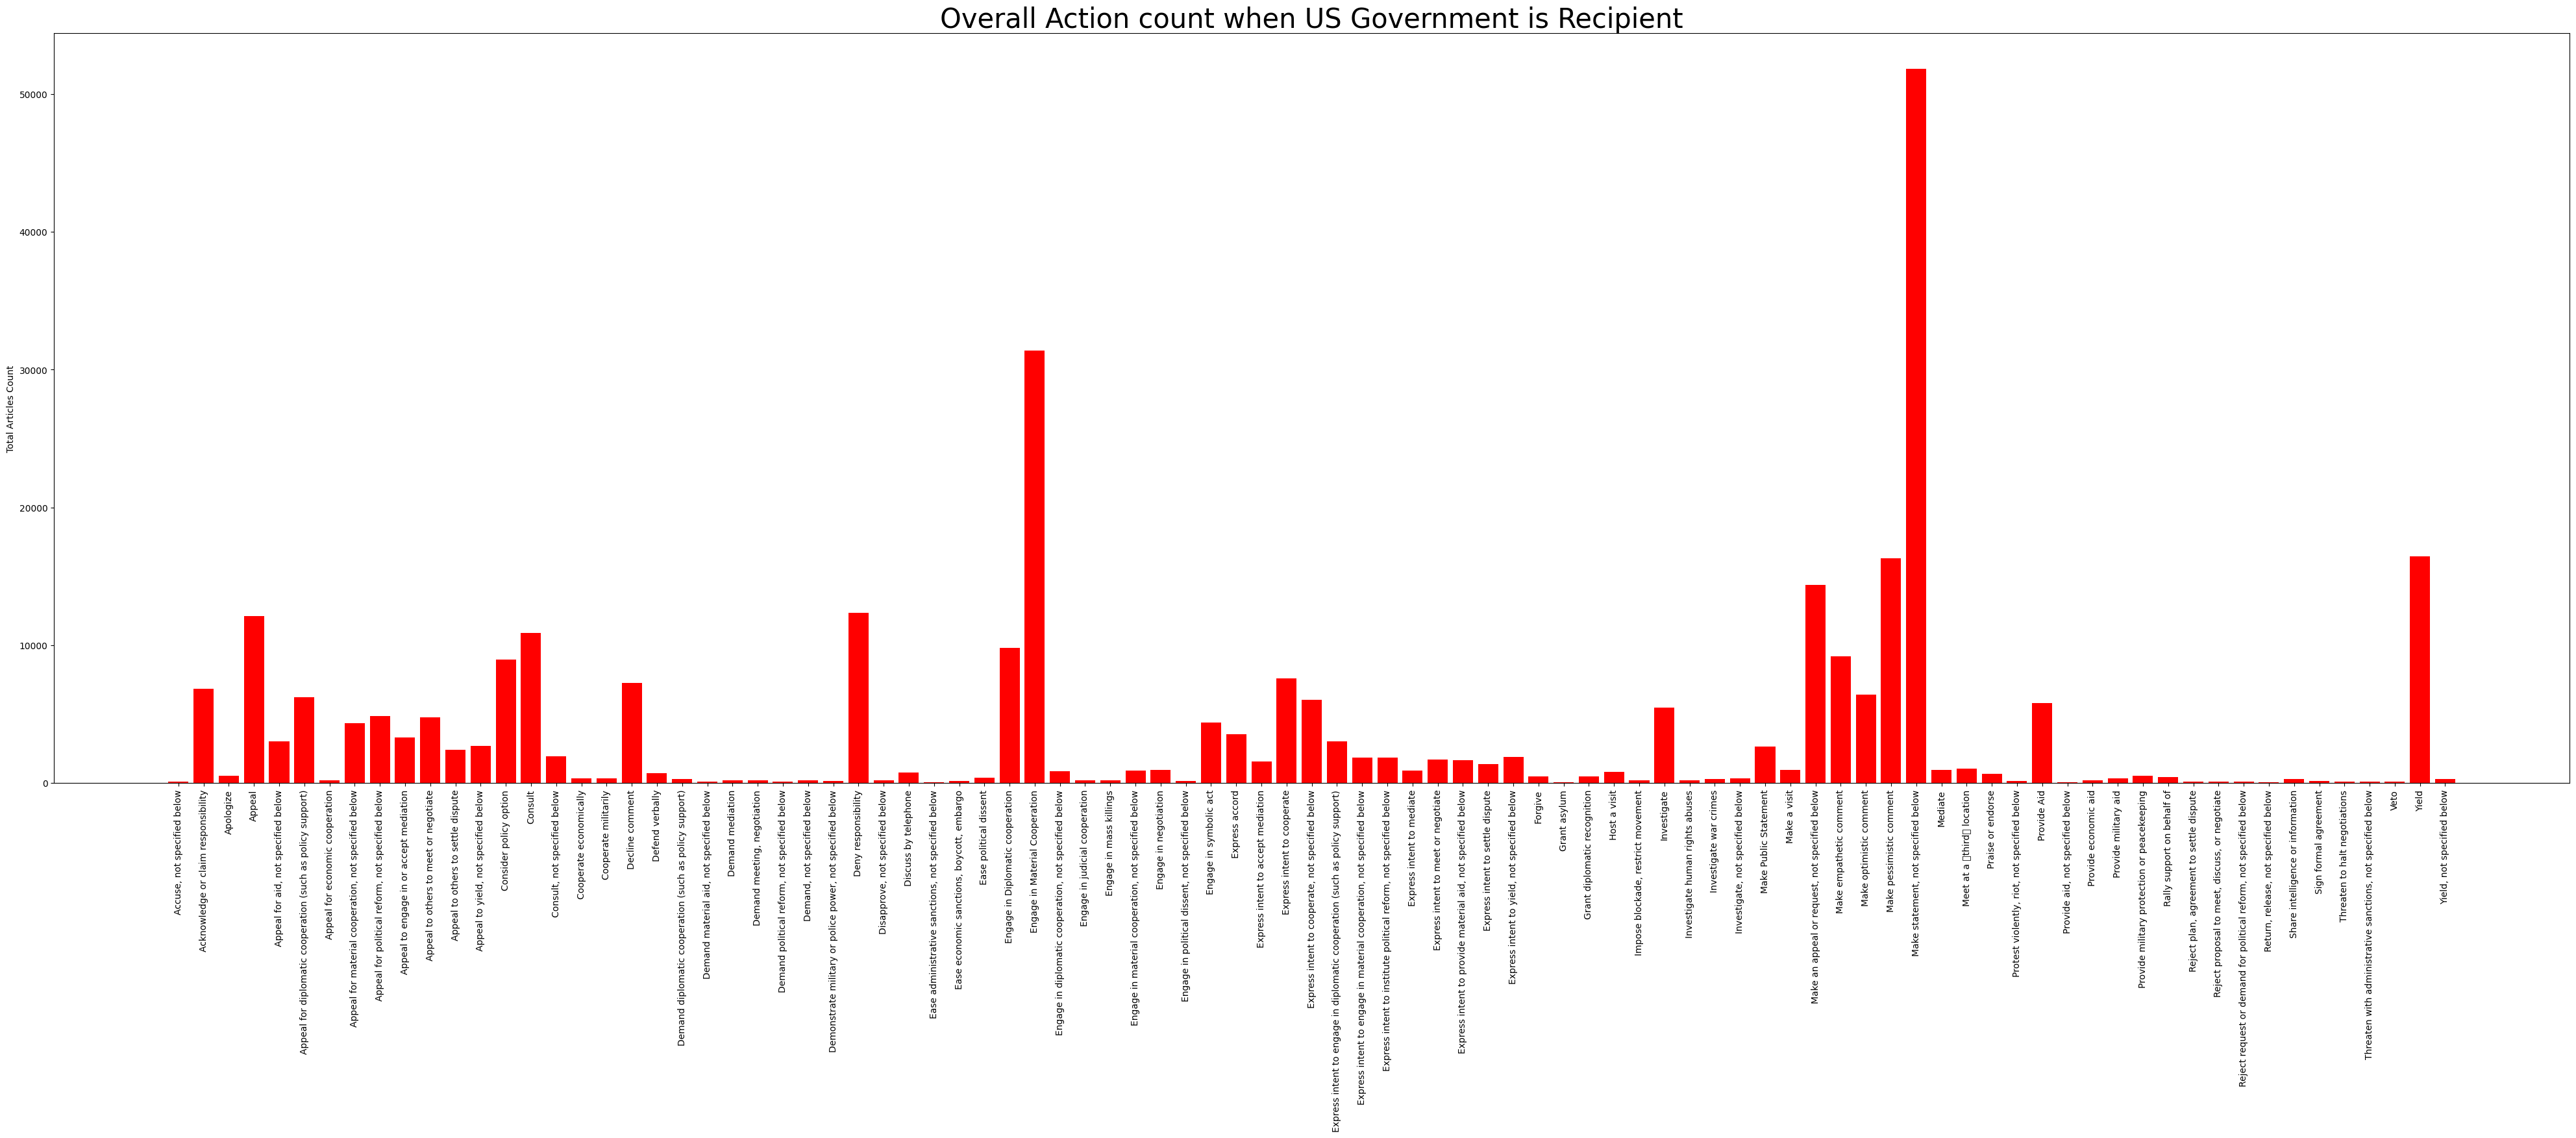

In [43]:
plt.figure(figsize = (50,15))
plt.bar(overall_action_us_gov_rec['Action Name'],overall_action_us_gov_rec['TotalArticleCount'],color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Action count when US Government is Recipient', fontsize = 30)
plt.ylabel('Total Articles Count')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


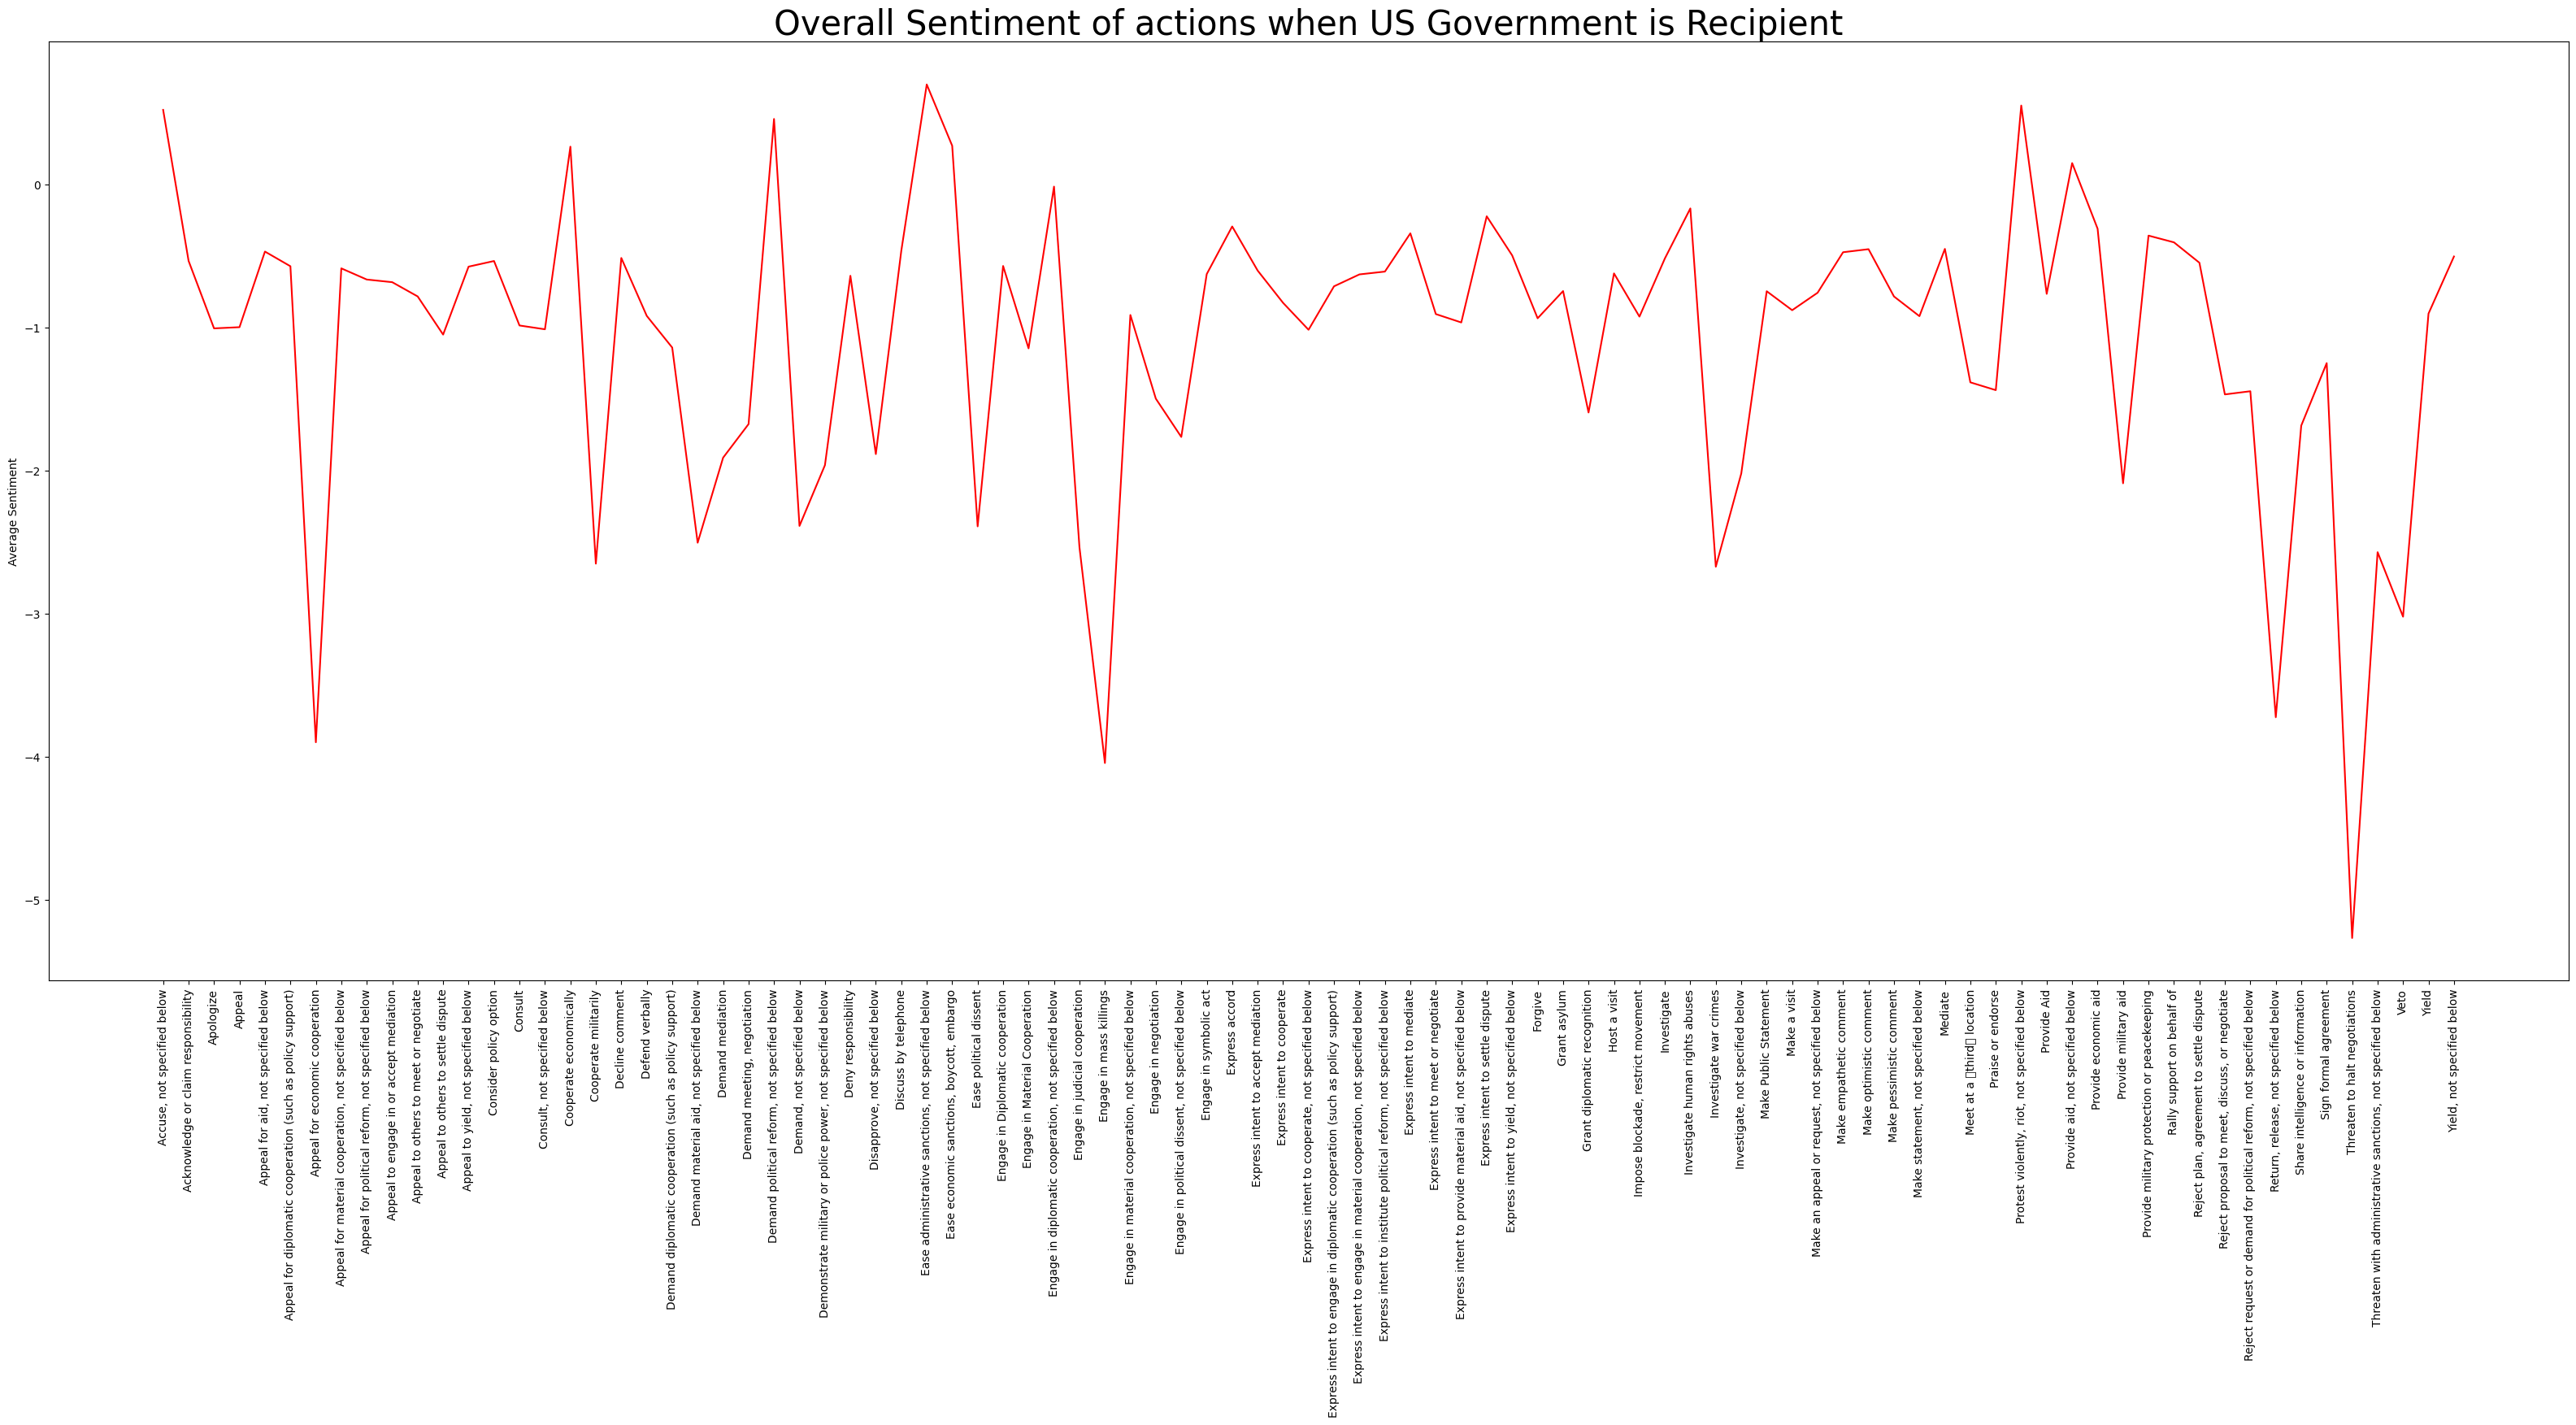

In [38]:
plt.figure(figsize = (40,15))
plt.plot(overall_action_us_gov_rec['Action Name'],overall_action_us_gov_rec['AvgSentiment'],color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Sentiment of actions when US Government is Recipient', fontsize = 30)
plt.ylabel('Average Sentiment')
plt.show()

In [45]:
top_action_monthly_usgov_rec = overall_action_us_gov_rec.groupby('Action Name')['TotalArticleCount'].sum().nlargest(10).index
print('Monthly Top 10 Target Countries:\n',top_action_monthly_usgov_rec.tolist())

Monthly Top 10 Target Countries:
 ['Make statement, not specified below', 'Engage in Material Cooperation', 'Yield', 'Make pessimistic comment', 'Make an appeal or request, not specified below', 'Deny responsibility', 'Appeal', 'Consult', 'Engage in Diplomatic cooperation', 'Make empathetic comment']


# Daily Avgerage sentiment of each Action Plotting

Text(0.5, 1.0, 'Daily Sentiment of Action = Consult when US Goverment is Recipient')

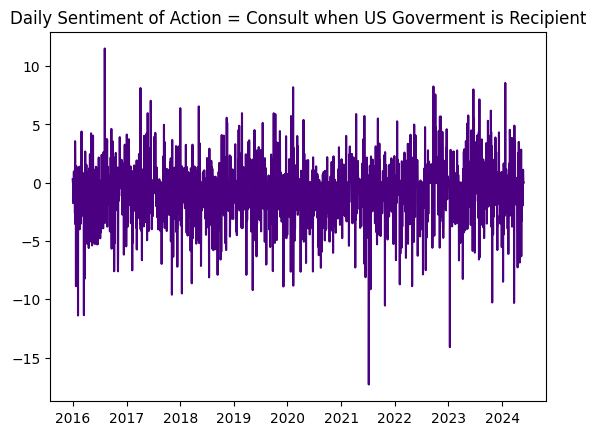

In [81]:
plt.plot(action_top10_rec.index,action_top10_rec['Consult'], color = 'indigo')
plt.title('Daily Sentiment of Action = Consult when US Goverment is Recipient')